In [51]:
import io
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from utils import get_cost_metrics, get_request_attainment_metrics, get_percentiles_request_e2e_time, hypervolume

In [52]:
"""
Helper functions to plot the results of the simulation
"""

def plot_num_replicas(output_dir):
    """
    Plot the number of replicas over time
    """
    img_path = os.path.join(output_dir, "num_replicas.png")
    num_replicas = plt.imread(img_path)
    plt.axis('off')
    plt.imshow(num_replicas)

def plot_request_arrival_rate(output_dir):
    """
    Plot the request arrival rate over time
    """
    img_path = os.path.join(output_dir, "request_arrival_rate.png")
    request_arrival_rate = plt.imread(img_path)
    plt.axis('off')
    plt.imshow(request_arrival_rate)

## Inferline autoscaler on Synthetic Trace
### Run the simulation on the synthetic trace using run_inferline.sh


In [ ]:
%%bash
./run_inferline.sh

In [54]:
"""
Get the plot directory from the simulator output directory.
"""
simulator_output_dir = os.path.abspath("../simulator_output")

service_levels = os.listdir(simulator_output_dir)
plot_dirs = {
    level: os.path.join(simulator_output_dir, level, os.listdir(os.path.join(simulator_output_dir, level))[0], 'plots') for level in service_levels
}
print(plot_dirs)

{'1': '/home/rayyan/Projects/GaTech/CS8803-SMR-Fall-24/vidur-autoscaling/simulator_output/1/2024-10-16_02-57-20-893014/plots'}


In [55]:
"""
Extract the cost metrics and request attainment metrics.
"""

cost_metrics = {}
percentiles_request_e2e_time = {}

for level in plot_dirs:
    plot_dir = plot_dirs[level]
    cost_metrics[level] = get_cost_metrics(plot_dir)
    request_e2e_time = get_request_attainment_metrics(plot_dir)
    percentiles_request_e2e_time[level] = get_percentiles_request_e2e_time(request_e2e_time, [75, 90, 99])

print("Cost Metrics: ", cost_metrics)
print("Percentiles Request E2E Time: ", percentiles_request_e2e_time)

Cost Metrics:  {'1': {'cost_per_hour_min': 8.0, 'cost_per_hour_max': 56.0, 'cost_per_hour_weighted_mean': 38.75734169310475, 'cost_per_hour_cumulative_sum': 38.75827987428821}}
Percentiles Request E2E Time:  {'1': {75: np.float64(0.1602462765115433), 90: np.float64(0.2142778240054212), 99: np.float64(2.155952360938045)}}


In [56]:
"""
Save the cost metrics and request attainment metrics to a CSV file.
"""
table_data = []
for level in plot_dirs:
    cost_metric = cost_metrics[level]
    percentile_request_e2e_time = percentiles_request_e2e_time[level]
    table_data.append([level, cost_metric["cost_per_hour_weighted_mean"], cost_metric["cost_per_hour_cumulative_sum"], percentile_request_e2e_time[75], percentile_request_e2e_time[90], percentile_request_e2e_time[99]])

print("Table Data: ", table_data)

import csv

with open("result_inferline.csv", mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(["service Level", "Mean Cost($) Per Hour", "Total Cost($)", "P75 E2E Latency(s)", "P90 E2E Latency(s)", "P99 E2E Latency(s)"])
    for row in table_data:
        writer.writerow(row)

Table Data:  [['1', 38.75734169310475, 38.75827987428821, np.float64(0.1602462765115433), np.float64(0.2142778240054212), np.float64(2.155952360938045)]]


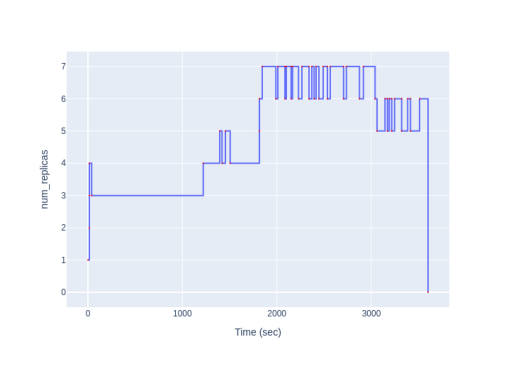

In [57]:
"""
Plot the number of replicas as a function of time
"""
plot_num_replicas(plot_dirs['1'])

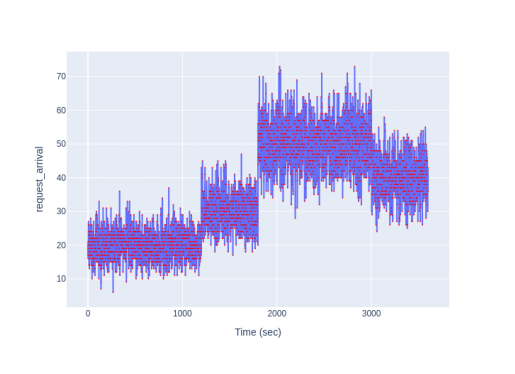

In [58]:
"""
Plot the request arrival rate as a function of time
"""
plot_request_arrival_rate(plot_dirs['1'])

## Custom autoscaler on Synthetic Trace
### Run the simulation on the synthetic trace with 3 levels of reactiveness using run_cutom.sh

In [ ]:
%%bash
./run_custom.sh

In [60]:
"""
Get the plot directories for all the service levels in the simulator output directory.
"""
simulator_output_dir = os.path.abspath("../simulator_output")

service_levels = os.listdir(simulator_output_dir)
plot_dirs = {
    level: os.path.join(simulator_output_dir, level, os.listdir(os.path.join(simulator_output_dir, level))[0], 'plots') for level in service_levels
}
print(plot_dirs)

{'2': '/home/rayyan/Projects/GaTech/CS8803-SMR-Fall-24/vidur-autoscaling/simulator_output/2/2024-10-16_02-58-32-511069/plots', '1': '/home/rayyan/Projects/GaTech/CS8803-SMR-Fall-24/vidur-autoscaling/simulator_output/1/2024-10-16_02-57-57-145749/plots', '3': '/home/rayyan/Projects/GaTech/CS8803-SMR-Fall-24/vidur-autoscaling/simulator_output/3/2024-10-16_02-59-08-461959/plots'}


In [61]:
"""
Extract the cost metrics and request attainment metrics for all the service levels.
"""

cost_metrics = {}
percentiles_request_e2e_time = {}

for level in plot_dirs:
    plot_dir = plot_dirs[level]
    cost_metrics[level] = get_cost_metrics(plot_dir)
    request_e2e_time = get_request_attainment_metrics(plot_dir)
    percentiles_request_e2e_time[level] = get_percentiles_request_e2e_time(request_e2e_time, [75, 90, 99])

print("Cost Metrics: ", cost_metrics)
print("Percentiles Request E2E Time: ", percentiles_request_e2e_time)

Cost Metrics:  {'2': {'cost_per_hour_min': 8.0, 'cost_per_hour_max': 56.0, 'cost_per_hour_weighted_mean': 38.31183492185405, 'cost_per_hour_cumulative_sum': 38.31276231885956}, '1': {'cost_per_hour_min': 8.0, 'cost_per_hour_max': 56.0, 'cost_per_hour_weighted_mean': 36.078102336471815, 'cost_per_hour_cumulative_sum': 36.07897566253776}, '3': {'cost_per_hour_min': 8.0, 'cost_per_hour_max': 56.0, 'cost_per_hour_weighted_mean': 40.65634791138395, 'cost_per_hour_cumulative_sum': 40.65733206093943}}
Percentiles Request E2E Time:  {'2': {75: np.float64(0.1671017034509532), 90: np.float64(0.2377163909723094), 99: np.float64(5.590083962474409)}, '1': {75: np.float64(0.1928380575038772), 90: np.float64(0.2786979907950808), 99: np.float64(5.741742140141696)}, '3': {75: np.float64(0.1451899016026914), 90: np.float64(0.1927047017147742), 99: np.float64(2.155952360938045)}}


In [62]:
"""
Save the cost metrics and request attainment metrics to a CSV file.
"""
table_data = []
for level in plot_dirs:
    cost_metric = cost_metrics[level]
    percentile_request_e2e_time = percentiles_request_e2e_time[level]
    table_data.append([level, cost_metric["cost_per_hour_weighted_mean"], cost_metric["cost_per_hour_cumulative_sum"], percentile_request_e2e_time[75], percentile_request_e2e_time[90], percentile_request_e2e_time[99]])

print("Table Data: ", table_data)

import csv

with open("result_custom.csv", mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(["service Level", "Mean Cost($) Per Hour", "Total Cost($)", "P75 E2E Latency(s)", "P90 E2E Latency(s)", "P99 E2E Latency(s)"])
    for row in table_data:
        writer.writerow(row)

Table Data:  [['2', 38.31183492185405, 38.31276231885956, np.float64(0.1671017034509532), np.float64(0.2377163909723094), np.float64(5.590083962474409)], ['1', 36.078102336471815, 36.07897566253776, np.float64(0.1928380575038772), np.float64(0.2786979907950808), np.float64(5.741742140141696)], ['3', 40.65634791138395, 40.65733206093943, np.float64(0.1451899016026914), np.float64(0.1927047017147742), np.float64(2.155952360938045)]]


In [63]:
"""
Use the table data to generate a pareto curve for the total cost and 90th percentile E2E time
"""
def plot_pareto_curve(table_data, reference_cost, reference_time):
    total_cost = [row[2] for row in table_data]
    e2e_time_90th = [row[4] for row in table_data]

    # Clip to the reference cost and time
    total_cost = [min(cost, reference_cost) for cost in total_cost]
    e2e_time_90th = [min(time, reference_time) for time in e2e_time_90th]

    service_labels = [f"R{row[0]}" for row in table_data]

    plt.plot(total_cost, e2e_time_90th)
    plt.xlabel("Total Cost($)")
    plt.ylabel("P90 E2E Latency(s)")
    
    # Filling rectangles for the hypervolume
    for i in range(len(total_cost)):
        plt.fill_betweenx([e2e_time_90th[i], reference_time], total_cost[i], reference_cost, color='lightblue', alpha=1)

    # Annotate the points
    for i, label in enumerate(service_labels):
        plt.annotate(label, (total_cost[i], e2e_time_90th[i]))


    # Mark and annotate the reference point (reference cost, reference time)
    plt.scatter(reference_cost, reference_time, color='black', label='Reference Point')
    
    # Mark and annotate the generated pareto curve
    plt.scatter(total_cost, e2e_time_90th, color='red', label='Generated Pareto Curve')

    handles, labels = plt.gca().get_legend_handles_labels()

    # Add legend for the hypervolume
    hypervolume_patch = Patch(color='lightblue', label='Hypervolume')
    handles.append(hypervolume_patch)

    # Add legend for the reference point
    plt.legend(handles=handles)

    # Plot image
    plt.show()

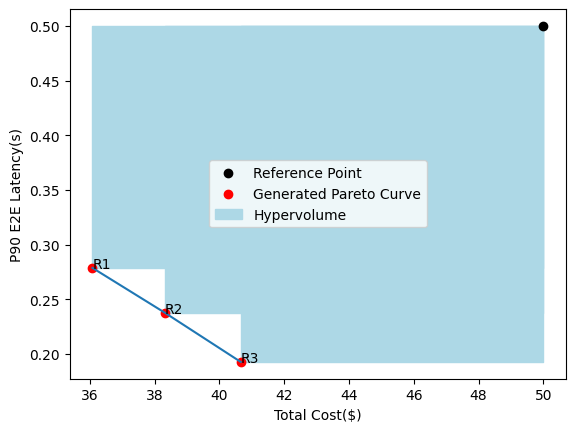

Normalized Hypervolume:  0.19127296549386352


In [69]:
"""
Plot the pareto curve and compute the normalized hypervolume score
"""

# Sorted the table data based on the total cost
sorted_table_data = sorted(table_data, key=lambda x: x[2])

# Clip the cost and time to the reference cost and time and normalize the values with respect to the reference cost and time
reference_cost = 50
reference_time = 0.5

plot_pareto_curve(sorted_table_data, reference_cost, reference_time)
hypervolume_score = hypervolume(sorted_table_data, reference_cost, reference_time)
print("Normalized Hypervolume: ", hypervolume_score)

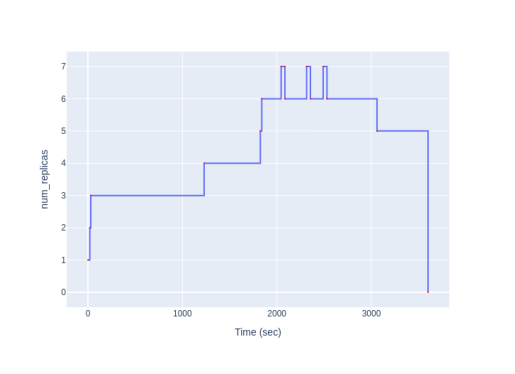

In [65]:
"""
Plot the number of replicas as a function of time for the service level 1
"""
plot_num_replicas(plot_dirs['1'])

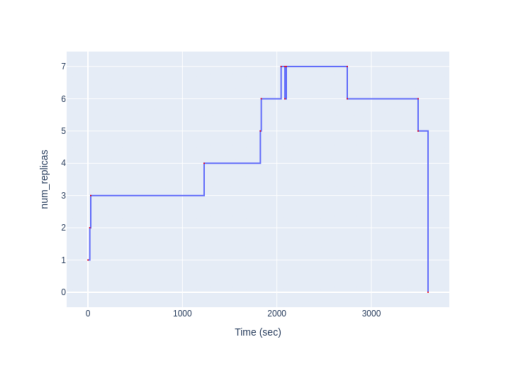

In [66]:
"""
Plot the number of replicas as a function of time for the service level 2
"""
plot_num_replicas(plot_dirs['2'])

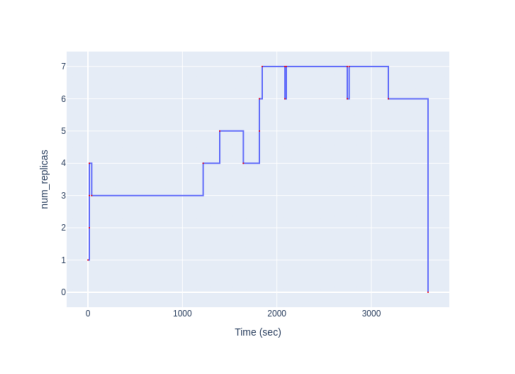

In [67]:
"""
Plot the number of replicas as a function of time for the service level 3
"""
plot_num_replicas(plot_dirs['3'])

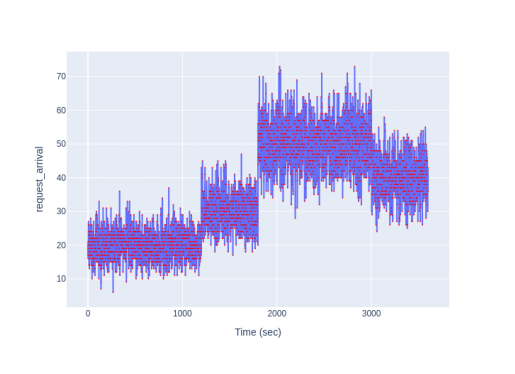

In [68]:
"""
Plot the request arrival rate as a function of time
"""
plot_request_arrival_rate(plot_dirs['1'])